Sprint 3

Team id:Team ID	PNT2022TMID25747

Importing the required libraries

In [ ]:
# pip install tensorflow --upgrade  --To install tensorflow

In [1]:
import numpy as np
import tensorflow 
import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras import layers 
from keras.layers import Dense, Flatten 
from keras.layers import Conv2D 
from keras.utils import np_utils 
import matplotlib.pyplot as plt  

LOAD DATA

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () 

In [ ]:
print (x_train.shape)  
print (x_test.shape)

In [ ]:
x_train[0]

Plot The Image:

In [ ]:
plt.imshow(x_train[7000])    

In [ ]:
np.argmax(y_train[7000])

Reshaping Dataset

In [7]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

Applying One Hot Encoding

In [8]:
number_of_classes = 10  

In [9]:
y_train = np_utils.to_categorical (y_train, number_of_classes) 
y_test = np_utils.to_categorical (y_test, number_of_classes)

Add CNN Layers

In [10]:
model=Sequential ()

In [11]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [12]:
model.add(Flatten())
model.add(Dense(number_of_classes,activation = 'softmax'))

Compiling the model

In [13]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [14]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Train the model

In [15]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 403s 213ms/step - loss: 0.2335 - accuracy: 0.9539 - val_loss: 0.1060 - val_accuracy: 0.9697
Epoch 2/5
1875/1875 [==============================] - 371s 198ms/step - loss: 0.0681 - accuracy: 0.9786 - val_loss: 0.0763 - val_accuracy: 0.9784
Epoch 3/5
1875/1875 [==============================] - 395s 211ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0831 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 421s 224ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0890 - val_accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 423s 226ms/step - loss: 0.0278 - accuracy: 0.9918 - val_loss: 0.1130 - val_accuracy: 0.9771


Observing the metrics

In [16]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics [Test loss, Test Accuracy] : ")
print(metrics)

Metrics [Test loss, Test Accuracy] : 
[0.11298686265945435, 0.9771000146865845]


Test The Model

In [17]:
prediction=model.predict(x_test[7000:7001])
print(prediction)

1/1 [==============================] - 0s 316ms/step
[[1.4966827e-16 1.0000000e+00 3.6822836e-12 3.0722881e-20 7.5321244e-10
  3.4331362e-16 2.8954590e-17 3.8201555e-13 4.1869763e-10 1.9107032e-17]]


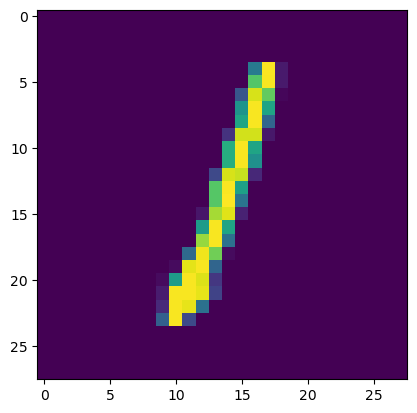

In [18]:
plt.imshow(x_test[7000])

In [19]:
import numpy as np
print(np.argmax(prediction, axis=1)) 

[1]


In [20]:
np.argmax(y_test[7000:7001]) 

1

Save The model

In [21]:
model.save('models/mnistData.h5')

In [22]:
cd models

c:\Users\hari9\Desktop\college\Handwritten Recognition\models


In [23]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistData.h5

a mnistData.h5


In [ ]:
# pip install watson-machine-learning-client --upgrade      
#used to install ibm watsonn studio

Cloud deploy

In [24]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"5rzQhIHIUmvhPg67cgRRjqIHHie7GoUBaoUwwPmAietm"
}
client = APIClient(credentials)
client

In [25]:
client.spaces.get_details()

{'resources': [{'entity': {'description': '',
    'name': 'Project',
    'scope': {'bss_account_id': '0d54843d88a845a889b24895b898ec88'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'fb87968d-ebd7-4300-baf1-0eb5705687cd',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': '0241e1e1a52c4a1cbcd7373584ef6735',
        'api_key': 'vDJagj39pjgcYrtGJiuQhoS4FFW7NTixBiOvFbUtq_7d',
        'secret_access_key': '0944a8b6b327d8a41c321b6ca8ed82bdcf9263a9b9437884',
        'service_id': 'ServiceId-041e45ec-8554-4e98-b989-ca9cedbb45ec'},
       'editor': {'access_key_id': 'e0309ad17d424c8794f920cfb3d53d29',
        'api_key': 'aWzIu03d_2JsmDPcIoRHeHCfwAmGrwjx9uIN0WjyJJMB',
        'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/0d54843d88a845a889b24895b898ec88:d4785e41-84ad-4577-a9de-ff0bca916b7a::',
        'secret_access_key': 'fd06018c4a7ee474d8c98dd7a2602f87a65

In [26]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [27]:
space_uid = guid_from_space_name(client,'Project')
print("Space UID = " + space_uid)

Space UID = c8cc722f-e519-43f7-b5ee-bb774805efca


In [28]:
client.set.default_space(space_uid)

'SUCCESS'

In [29]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [30]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [31]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [32]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-15T14:17:42.265Z',
  'id': '11aa083c-fce0-458e-a7fa-a0610a321ad9',
  'modified_at': '2022-11-15T14:17:57.531Z',
  'name': 'Digit recognition model',
  'owner': 'IBMid-664004035P',
  'resource_key': '5c129612-f0df-41a6-95a7-1ab2c1f4929d',
  'space_id': 'c8cc722f-e519-43f7-b5ee-bb774805efca'},
 'system': {'warnings': []}}

In [33]:
model_id = client.repository.get_model_id(model_details)
model_id

'11aa083c-fce0-458e-a7fa-a0610a321ad9'

In [34]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'c:\\Users\\hari9\\Desktop\\college\\Handwritten Recognition\\models/DigitRecog_IBM_model.tar.gz'

In [35]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 7E3D-0D71

 Directory of c:\Users\hari9\Desktop\college\Handwritten Recognition\models

15-11-2022  19:49    <DIR>          .
15-11-2022  19:49    <DIR>          ..
15-11-2022  19:49         2,326,130 DigitRecog_IBM_model.tar.gz
15-11-2022  19:45         2,326,130 handwritten-digit-recognition-model_new.tgz
15-11-2022  19:43         2,475,168 mnistData.h5
               3 File(s)      7,127,428 bytes
               2 Dir(s)  151,075,254,272 bytes free


TEST MODEL

In [36]:
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [37]:
model = load_model("mnistData.h5")

In [41]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vDJagj39pjgcYrtGJiuQhoS4FFW7NTixBiOvFbUtq_7d',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'handwritten-digit-recognition88'
object_key = '4.png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

#The IBM Oject storage is where the Pictures has been uploaded to test the data via IBM Cloud

In [42]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [43]:
img

In [44]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [45]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 410ms/step
[[1.0409454e-10 2.0360837e-13 2.3984970e-10 7.5701868e-11 1.0000000e+00
  1.7121428e-09 2.9998042e-11 2.2762569e-08 6.0619733e-13 3.0075377e-08]]


In [46]:
print(np.argmax(pred, axis=1)) #printing our Labels

[4]
